# Logistic regression

### Binary logistic regression

In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os

path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [34]:
X = data.values[:, :2].T
y = data.values[:, 2:].T
theta = np.zeros((X.shape[0] + 1, 1))
X = np.concatenate([np.ones([1, X.shape[1]]), X])
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :]))/(np.std(X[i, :]))

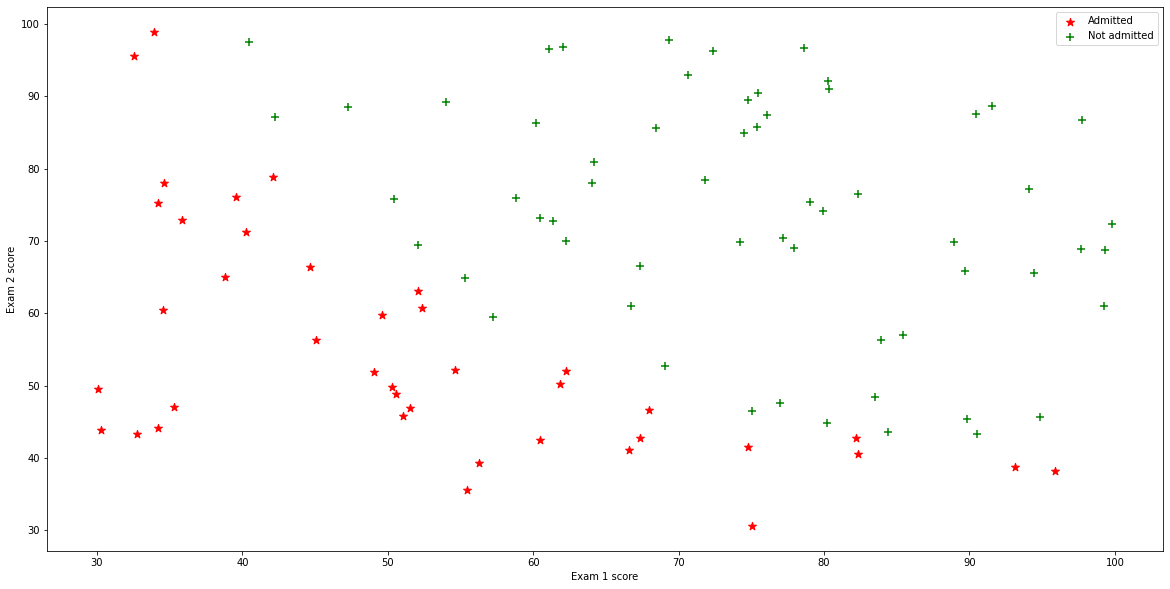

In [35]:
data_set_0 = data[data['Admitted']==0]
data_set_1 = data[data['Admitted']==1]

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data_set_0['Exam 1'] , data_set_0['Exam 2'], marker='*', color='r', s=70)
ax.scatter(data_set_1['Exam 1'] , data_set_1['Exam 2'], marker='+', color='g', s=70)
ax.legend(['Admitted', 'Not admitted'])
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
plt.show()

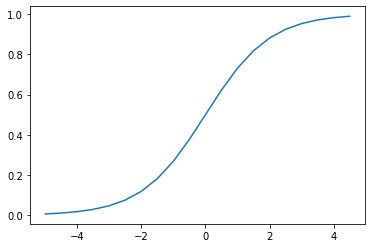

In [36]:
def sig(t):
    return 1/(1 + (np.exp(-t)))

x = np.arange(-5, 5, 0.5)

plt.plot(x, sig(x))

In [37]:
def cost(theta, X, y):
    return (-(y * np.log(sig(theta.T@X))) - (1 - y)*np.log(1 - (sig(theta.T@X)))).sum()/X.shape[1]

theta = np.zeros((X.shape[0], 1))

print(cost(theta, X, y))

0.6931471805599453


In [38]:
def simple_gradient(X, y, theta, alpha, it):
    cost_lst = []
    for i in range(it):
        theta = theta - alpha*((sig(theta.T@X)  - y)@X.T).T/X.shape[1]
        cost_lst.append((cost(theta, X, y)))
    return theta, cost_lst

it = 150
alpha = 1
theta, cost = simple_gradient(X, y, theta, alpha, it)
print(theta, cost[-1])

[[1.41957362]
 [3.35941597]
 [3.11271333]] 0.2064071430444978


In [39]:
predicted = np.round(sig(theta.T@X))
correct = (predicted == y).sum()
accuracy = correct/y.shape[1]
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.89


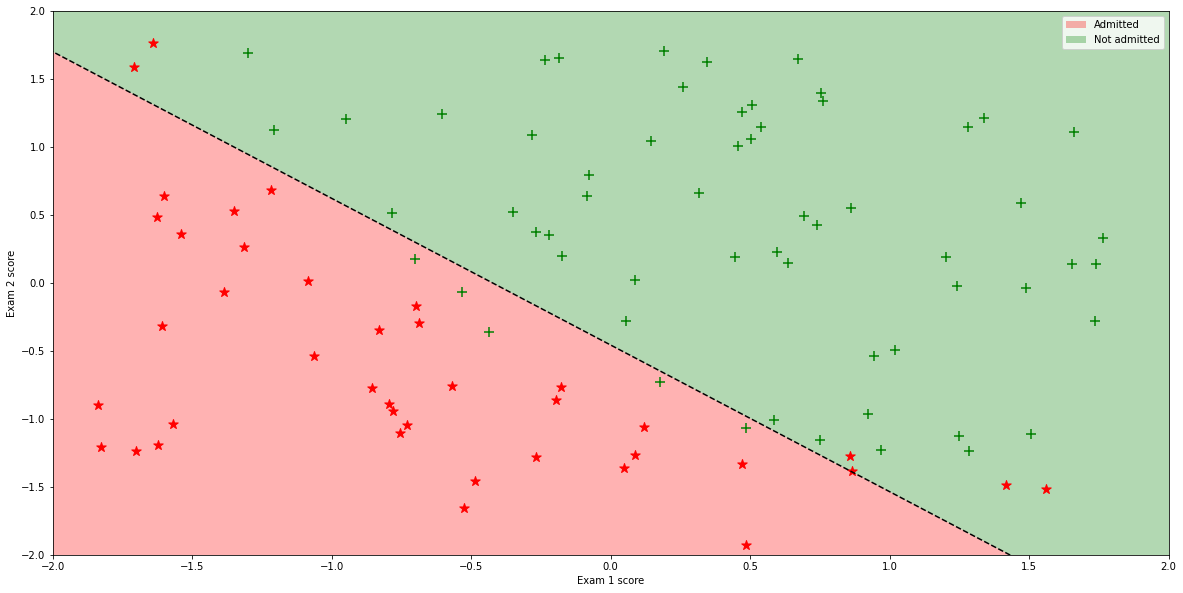

In [40]:
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]

x1 = np.arange(-2.5, 2.5, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1

fig, ax = plt.subplots(figsize=(20,10))

ax.fill_between(x1, x2, x2[-1], facecolor='red', alpha=0.3)
ax.fill_between(x1, x2, x2[0], facecolor='green', alpha=0.3)

ax.scatter(X1_1, X2_1, marker='+', color='g', s=100)
ax.scatter(X1_0, X2_0, marker='*', color='r', s=100)
ax.plot(x1, x2, 'k--')

ax.legend(['Admitted', 'Not admitted'])
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.set(xlim=(-2,2), ylim=(-2,2))
plt.show()

### Multi-class logistic regression

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)
reg = LogisticRegression().fit(X_train, Y_train)

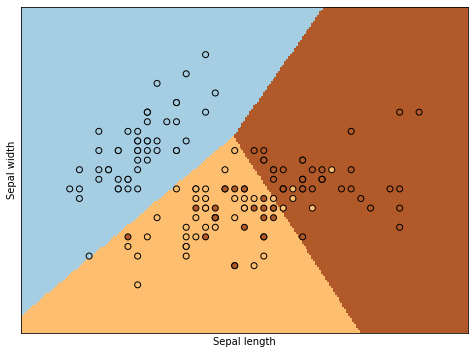

In [42]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
 
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

In [43]:
Y_pred_proba = reg.predict_proba(X_test)

print(Y_pred_proba)

[[7.19147457e-03 4.86837649e-01 5.05970876e-01]
 [2.31121912e-01 6.49410480e-01 1.19467608e-01]
 [8.91454538e-03 3.82453318e-01 6.08632136e-01]
 [5.54558179e-03 5.92379876e-01 4.02074542e-01]
 [2.62352855e-02 4.53284924e-01 5.20479790e-01]
 [9.24138341e-01 4.53036901e-02 3.05579692e-02]
 [8.13810851e-01 1.56740414e-01 2.94487354e-02]
 [7.46395674e-02 5.46514435e-01 3.78845998e-01]
 [9.60702482e-01 2.70269557e-02 1.22705622e-02]
 [1.40568827e-02 4.93157069e-01 4.92786048e-01]
 [1.04234500e-01 6.24109826e-01 2.71655674e-01]
 [5.54558179e-03 5.92379876e-01 4.02074542e-01]
 [9.39634105e-01 5.38217664e-02 6.54412832e-03]
 [5.77098373e-03 3.18605208e-01 6.75623808e-01]
 [8.03648147e-05 2.06826968e-01 7.93092667e-01]
 [9.79071869e-01 1.28905436e-02 8.03758719e-03]
 [9.24138341e-01 4.53036901e-02 3.05579692e-02]
 [2.27201248e-01 4.03479721e-01 3.69319031e-01]
 [7.01620639e-01 2.02081171e-01 9.62981899e-02]
 [1.45382527e-02 5.36721820e-01 4.48739928e-01]
 [2.15700304e-04 2.01890846e-01 7.978934

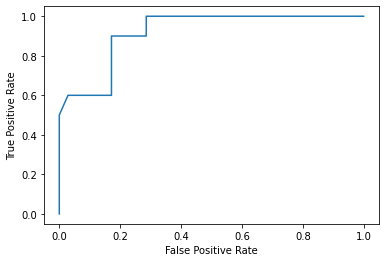

In [44]:
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba[:,1], pos_label=reg.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

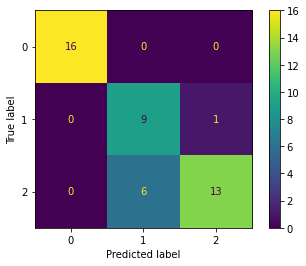

In [45]:
Y_pred = reg.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [46]:
print('Accuracy: {}'.format(accuracy_score(Y_test, Y_pred)))

Accuracy: 0.8444444444444444
